In [1]:
from keras.preprocessing.image import ImageDataGenerator
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from keras.layers import Convolution2D as conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation,Dropout, Flatten, Dense
from tensorflow.keras.preprocessing import image
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import os , sys
from PIL import Image as im
from os import listdir

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop , Adam, SGD
from tensorflow.keras import Model
from keras.layers import GlobalAveragePooling2D
from sklearn.model_selection import train_test_split

import cv2
import glob    # glob (short for global) is used to return all file paths that match a specific pattern.
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics
from keras.callbacks import EarlyStopping

**ResNet50**

In [2]:
IMG_SHAPE=(224,224,3)
IMG_SIZE = (224, 224)
#IMG_SHAPE = (150, 150, 3) #(150,150) were used before in Inception V3

In [3]:
#######################################################
#Get the convolution base of a Pre-Trained CNN (here it is ResNet50)
#######################################################
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights="imagenet")

94765736/94765736 [==============================] - 2s 0us/step


In [73]:
#Store the number of top layers from the convolution base you want to discard in
#the variable discard_layers
discard_layers = 11 # i.e 11, 21, 22, 23 , at 22 i got max accuracy

#x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
#discard few top layers of convolution base and add global
#average pooling layer on top of it.
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.layers[-discard_layers].output)


In [74]:
updated_model = tf.keras.models.Model(inputs=base_model.input,
                              outputs= x)

In [75]:
#See all the layers of a model
updated_model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [76]:
num_layers = len(updated_model.layers)
print(f'The model has {num_layers} layers.')

The model has 166 layers.


**DATA Pre-Processing**

In [33]:

Normal = []
for filename in glob. glob('/content/drive/MyDrive/DataSet_CBIS-DDSM/Mass_Train_Set/BENIGN_WITHOUT_CALLBACK/*.jpg'):
  n= cv2.imread(filename)
  img=np.array(n)
  n1 = cv2.resize(img , IMG_SIZE)
  Normal. append(n1)
  n= tf.image.flip_up_down(n1)
  Normal. append(n)
  n= tf.image.flip_left_right(n1)
  Normal. append(n)
  n= tf.image.adjust_brightness(n1, delta=0.2)
  Normal. append(n)
  n= tf.image.adjust_contrast (n1, 2.25 )
  Normal. append(n)
  n= tf.image.rot90 (n1, k=1 )
  Normal.append(n)
  n = tf.image.rot90 (n1, k=2 )
  Normal.append(n)
  n= tf.image.rot90 (n1, k=3 )
  Normal.append(n)
Normal=np.array(Normal)


In [34]:
Benign = []
for filename in glob. glob('/content/drive/MyDrive/DataSet_CBIS-DDSM/Mass_Train_Set/BENIGN/*.jpg'):
  n= cv2.imread(filename)
  img=np.array(n)
  n2 = cv2.resize(img , IMG_SIZE)
  Benign. append(n2)
  n= tf.image.flip_up_down(n2)
  Benign. append(n)
  n= tf.image.flip_left_right(n2)
  Benign. append(n)
  n= tf.image.adjust_brightness(n2, delta=0.2)
  Benign. append(n)
"""  n= tf.image.adjust_contrast (n2, 2.25 )
  Benign. append(n)
  n= tf.image.rot90 (n2, k=1 )
  Benign.append(n)
  n = tf.image.rot90 (n2, k=2 )
  Benign.append(n)
  n= tf.image.rot90 (n2, k=3 )
  Benign.append(n)"""
Benign=np.array(Benign)

In [35]:
Malignant = []
for filename in glob. glob('/content/drive/MyDrive/DataSet_CBIS-DDSM/Mass_Train_Set/MALIGNANT/*.jpg'):
  n= cv2.imread(filename)
  img=np.array(n)
  n3 = cv2.resize(img , IMG_SIZE)
  Malignant. append(n3)
  n= tf.image.flip_up_down(n3)
  Malignant. append(n)
  n= tf.image.flip_left_right(n3)
  Malignant. append(n)
  n= tf.image.adjust_brightness(n3, delta=0.2)
  Malignant. append(n)
"""  n= tf.image.adjust_contrast (n3, 2.25 )
  Malignant. append(n)
  n= tf.image.rot90 (n3, k=1 )
  Malignant.append(n)
  n = tf.image.rot90 (n3, k=2 )
  Malignant.append(n)
  n= tf.image.rot90 (n3, k=3 )
  Malignant.append(n) """
Malignant=np.array(Malignant)

In [36]:
print (len(Normal))
print( len(Benign) )
print( len(Malignant))

664
2196
2388


**Training Features Extraction of ResNet50**

In [79]:
Normal_features_1 = updated_model.predict(Normal, verbose= True)


21/21 [==============================] - 118s 6s/step


In [80]:
Benign_features_1 = updated_model.predict(Benign, verbose= True)


69/69 [==============================] - 391s 6s/step


In [81]:
Malignant_features_1 = updated_model.predict(Malignant, verbose= True)

75/75 [==============================] - 429s 6s/step


In [40]:
print(Benign_features_1.shape)

(2196, 2048)


In [ ]:
print(Normal_features_1[2])

[0.         0.         0.00595283 ... 1.8342158  0.         0.        ]


In [82]:
Training_features_ResNet50= np.concatenate((Normal_features_1, Benign_features_1, Malignant_features_1))

In [ ]:
print(Training_features_ResNet50.shape)

(5248, 2048)


**Data Labels**

In [83]:
labels_Normal= np.zeros((664,1))
labels_Benign= np.ones((2196,1))
labels_Malignant= np.zeros((2388,1))

labels_Malignant[:, 0] = 2

In [84]:
concatenated_labels= np.concatenate((labels_Normal, labels_Benign, labels_Malignant))

In [85]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train1 = ohe.fit_transform(concatenated_labels).toarray()

**Train, Test Split Sklearn**

In [86]:
X_train, X_test, y_train, y_test = train_test_split (Training_features_ResNet50,y_train1 ,
                                   random_state=0 ,
                                   test_size=0.20,
                                   shuffle=True )
#increase test size to 0.4 and check the results
#increase datasize by merging train and test dataset.

**Classifier Compilation...........FC Layer**

In [88]:
model = Sequential()
#model.add(Flatten())
#model.add(Dropout(0.2, input_shape=(2048,)))
model.add(Dense(1024, input_shape=(2048,), activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer = RMSprop(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [89]:
# Implement callback function to stop training
# when accuracy reaches e.g. ACCURACY_THRESHOLD = 0.95

ACCURACY_THRESHOLD= 0.95

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
          print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
          self.model.stop_training = True

In [68]:
callbacks = myCallback()

**Training on features extracted by ResNet50**

In [90]:
%%time
history=model.fit(
    X_train,y_train,
    batch_size= 32, validation_data=(X_test,y_test),
    epochs=400 , callbacks=[callbacks])
#validation_data=(X_test,y_test),

Epoch 1/400
132/132 [==============================] - 8s 51ms/step - loss: 0.8481 - accuracy: 0.5545 - val_loss: 0.7411 - val_accuracy: 0.5962
Epoch 2/400
132/132 [==============================] - 6s 45ms/step - loss: 0.7286 - accuracy: 0.6358 - val_loss: 0.9692 - val_accuracy: 0.4838
Epoch 3/400
132/132 [==============================] - 5s 38ms/step - loss: 0.6547 - accuracy: 0.6837 - val_loss: 0.8189 - val_accuracy: 0.5724
Epoch 4/400
132/132 [==============================] - 5s 36ms/step - loss: 0.6014 - accuracy: 0.7158 - val_loss: 0.9482 - val_accuracy: 0.5162
Epoch 5/400
132/132 [==============================] - 6s 45ms/step - loss: 0.5445 - accuracy: 0.7515 - val_loss: 0.5788 - val_accuracy: 0.7048
Epoch 6/400
132/132 [==============================] - 5s 36ms/step - loss: 0.5018 - accuracy: 0.7782 - val_loss: 0.5838 - val_accuracy: 0.6962
Epoch 7/400
132/132 [==============================] - 5s 39ms/step - loss: 0.4456 - accuracy: 0.8090 - val_loss: 0.9291 - val_accuracy:

**Evaluation of ResNet50**

In [91]:
train_acc = model.evaluate(X_train, y_train, verbose=0)
test_acc = model.evaluate(X_test, y_test, verbose=0)

print ("Training Accuracy: [Loss, Accuracy]= " + str(train_acc))
print ("Testing Accuracy:[Loss, Accuracy]= " + str(test_acc))

Training Accuracy: [Loss, Accuracy]= [1.3691428648598958e-06, 1.0]
Testing Accuracy:[Loss, Accuracy]= [0.49266356229782104, 0.9019047617912292]


In [ ]:
'''
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training' , 'Val_accuracy'], loc='lower right')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training' , 'Validation'], loc='upper right')
plt.show()

'''

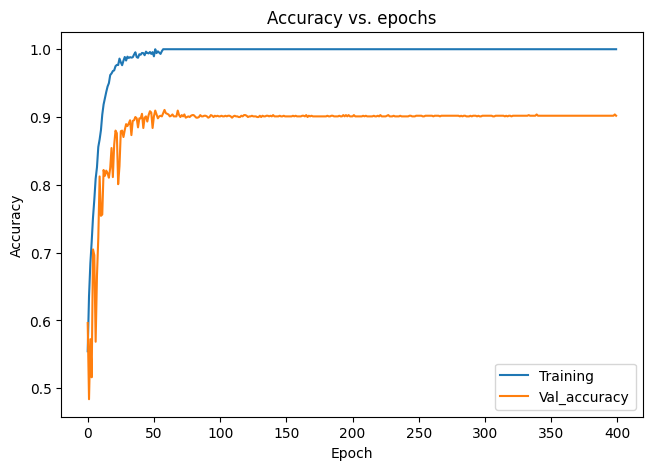

In [93]:
plt.figure(figsize=(7.5,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training' , 'Val_accuracy'], loc='lower right')

plt.show()

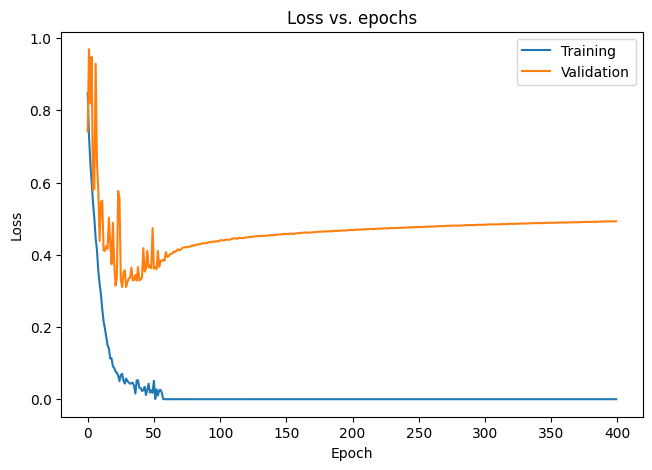

In [96]:
plt.figure(figsize=(7.5,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training' , 'Validation'], loc='upper right')
plt.show()

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics

In [98]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

33/33 [==============================] - 0s 9ms/step
[[135   8   7]
 [  6 385  42]
 [  3  37 427]]


ValueError: ignored

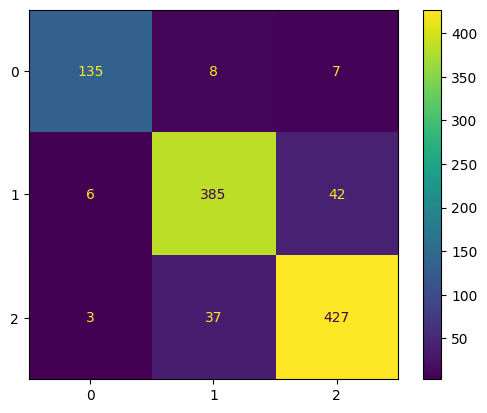

In [99]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [101]:
accuracy = accuracy_score(y_test, y_pred )
print ('Accuracy: %.4f' % accuracy)

Accuracy: 0.9019


In [102]:
recall = recall_score(y_test, y_pred , average='macro' )
print ('Recall: %.4f' % recall)

Recall: 0.9012


In [103]:
precision = precision_score(y_test, y_pred , average='macro')
print ('Precision: %.4f' % precision)

Precision: 0.9100


In [104]:
f1score = f1_score(y_test, y_pred , average='macro' )
print ('F1-Score: %.4f' % f1score)

F1-Score: 0.9054


**Data Augmentation**

In [ ]:
directory_train = "/content/drive/MyDrive/DataSet_CBIS-DDSM/Mass_Train_Set/"
directory_test = "/content/drive/MyDrive/DataSet_CBIS-DDSM/Mass_Test_Set/"
def get_ImageDataGenerator(validation_split=None):
    image_generator = ImageDataGenerator(rescale=(1/255.),
                                        validation_split=validation_split)
    return image_generator
image_gen_train = get_ImageDataGenerator(validation_split=0.2)
def get_generator(image_data_generator, directory, train_valid=None, seed=None):
    train_generator = image_data_generator.flow_from_directory(directory, batch_size=32, class_mode='categorical', target_size=(240,240), subset=train_valid, seed=seed)
    return train_generator
train_generator = get_generator(image_gen_train, directory_train, train_valid='training', seed=1)
validation_generator = get_generator(image_gen_train, directory_train, train_valid='validation')

Found 985 images belonging to 3 classes.
Found 244 images belonging to 3 classes.


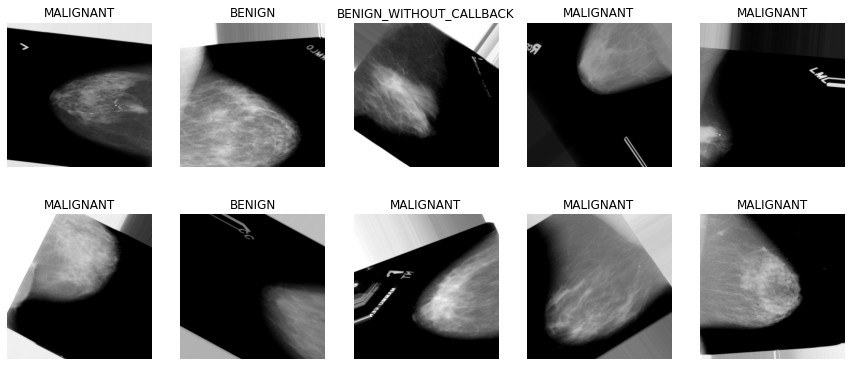

In [ ]:
target_labels = next(os.walk(directory_train))[1]

target_labels.sort()

batch = next(train_generator)
batch_images = np.array(batch[0])
batch_labels = np.array(batch[1])

target_labels = np.asarray(target_labels)

plt.figure(figsize=(15,10))
for n, i in enumerate(np.arange(10)):
    ax = plt.subplot(3,5,n+1)
    plt.imshow(batch_images[i])
    plt.title(target_labels[np.where(batch_labels[i]==1)[0][0]])
    plt.axis('off')